In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [59]:
df=pd.read_csv("C:\\Users\\thris\\Desktop\\anaemia\\output.csv")
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [60]:
df=df.drop("Number",axis=1)

In [61]:
df.describe()

,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000
mean,45.654175,28.875507,25.470325,12.150962
std,2.816294,1.554275,1.984671,2.512957
min,38.796800,25.140300,19.541300,2.800000
25%,43.911375,27.871300,24.896425,10.650000
50%,45.385350,28.948750,25.953200,12.600000
75%,46.968325,29.887275,26.721600,14.000000
max,54.647800,32.368100,29.841400,16.300000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           104 non-null    object 
 1   %Red Pixel    104 non-null    float64
 2   %Green pixel  104 non-null    float64
 3   %Blue pixel   104 non-null    float64
 4   Hb            104 non-null    float64
 5   Anaemic       104 non-null    object 
dtypes: float64(4), object(2)
memory usage: 5.0+ KB


In [63]:
df.isnull().sum()

Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [64]:
d1=df[df["Sex"]=="F"]

anemia_counts = d1['Anaemic'].value_counts()

fig = px.pie(
    anemia_counts,
    names=anemia_counts.index,
    values=anemia_counts.values,
    title='Distribution of Anemic and Non-Anemic Individuals (Females)',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.show()

In [65]:
d2=df[df["Sex"]=="M"]

anemia_counts = d2['Anaemic'].value_counts()

fig = px.pie(
    anemia_counts,
    names=anemia_counts.index,
    values=anemia_counts.values,
    title='Distribution of Anemic and Non-Anemic Individuals (Males)',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.show()

FEMALES ARE MORE ANAEMIC WHEN COMPARED TO MALE

<Axes: xlabel='%Red Pixel', ylabel='Count'>

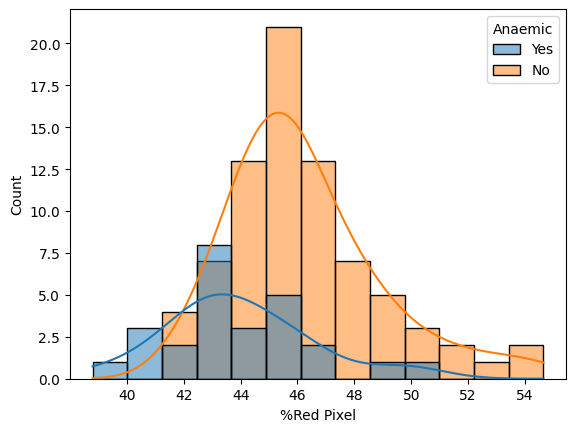

In [66]:
sns.histplot(x="%Red Pixel",data=df,hue="Anaemic",kde=True)

<Axes: xlabel='%Green pixel', ylabel='Count'>

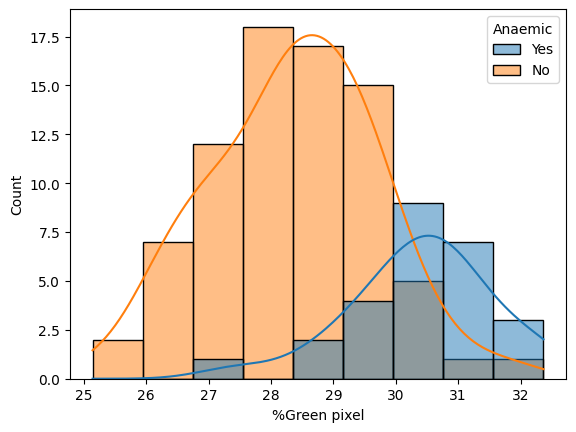

In [67]:
sns.histplot(x=
             "%Green pixel",data=df,hue="Anaemic",kde=True)

<Axes: xlabel='%Blue pixel', ylabel='Count'>

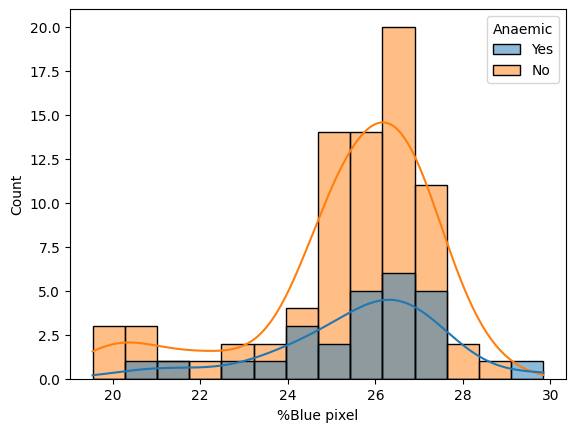

In [68]:
sns.histplot(x=
             "%Blue pixel",data=df,hue="Anaemic",kde=True)

<Axes: xlabel='Hb', ylabel='Count'>

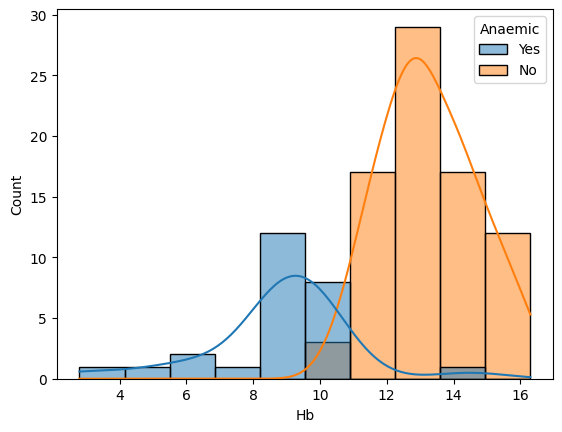

In [69]:
sns.histplot(x=
             "Hb",data=df,hue="Anaemic",kde=True)

In [70]:
fig=px.scatter_3d(x=df["%Blue pixel"],y=df["%Green pixel"],z=df["%Red Pixel"],color=df["Anaemic"],title="Relationship between red,gree,blue pixels")
fig.show()

In [71]:
fig=px.scatter(x=df["%Blue pixel"],y=df["%Green pixel"],color=df["Anaemic"],trendline="ols",title="Relationship between gree,blue pixels")
fig.show()

In [72]:
fig=px.scatter(x=df["%Red Pixel"],y=df["%Green pixel"],color=df["Anaemic"],trendline="ols",title="Relationship between green,red pixels")
fig.show()

In [73]:
fig=px.scatter(x=df["%Red Pixel"],y=df["%Blue pixel"],color=df["Anaemic"],trendline="ols",title="Relationship between blue,red pixels")
fig.show()

In [74]:
fig=px.scatter(x=df["%Red Pixel"],y=df["Hb"],color=df["Anaemic"],trendline="ols",title="Relationship between hb,red pixels")
fig.show()

In [75]:
fig=px.scatter(x=df["%Green pixel"],y=df["Hb"],color=df["Anaemic"],trendline="ols",title="Relationship between hb,green pixels")
fig.show()

In [76]:
fig=px.scatter(x=df["%Blue pixel"],y=df["Hb"],color=df["Anaemic"],trendline="ols",title="Relationship between hb,blue pixels")
fig.show()

In [77]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [78]:
le_sex = LabelEncoder()

# Fit with both 'M' and 'F'
le_sex.fit(['M', 'F'])

# Transform the 'Sex' column in the dataset
df['Sex'] = le_sex.transform(df['Sex'])

# Repeat for the 'Anaemic' column, assuming it has 'Yes' and 'No' or similar labels
le_anaemic = LabelEncoder()
le_anaemic.fit(['No', 'Yes'])  # Use the appropriate labels from your dataset
df['Anaemic'] = le_anaemic.transform(df['Anaemic'])

In [80]:
x=df.drop("Anaemic",axis=1)
y=df["Anaemic"]

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [83]:
model=RandomForestClassifier()

In [84]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
pred=model.predict(x_test)

In [86]:
accuracy_score(pred,y_test)

1.0

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[16,  0],
       [ 0,  5]], dtype=int64)

In [88]:
import pickle

In [89]:
with open('anaemia_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('label_encoder_sex.pkl', 'wb') as le_file:
    pickle.dump(le_sex, le_file)

with open('label_encoder_anaemic.pkl', 'wb') as le_file:
    pickle.dump(le_anaemic, le_file)

In [90]:
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,1
1,0,45.6033,28.1900,26.2067,13.5,0
2,0,45.0107,28.9677,26.0215,11.7,0
3,0,44.5398,28.9899,26.4703,13.5,0
4,1,43.2870,30.6972,26.0158,12.4,0


In [91]:
df["Sex"].value_counts()

Sex
1    55
0    49
Name: count, dtype: int64